<div class="alert alert-info">
<h2> Анализ объявлений о продаже квартир <a class="tocSkip"></h2>
    
<b>Цель:</b> научиться определять рыночную стоимость объектов недвижимости для установки параметров будущей автоматизированной системы поиска аномалий и мошеннической деятельности.

<b>Задача:</b> поиск интересных особенностей и зависимостей, которые существуют на рынке недвижимости Санкт-Петербурга и соседних населённых пунктах.
    
<b>Содержание:</b>
   1. Предобработка данных;
   2. Исследовательский анализ данных;
   5. Общие выводы.</div>

### Предобработка данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
#проверка таблицы
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
#проверка показателей в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

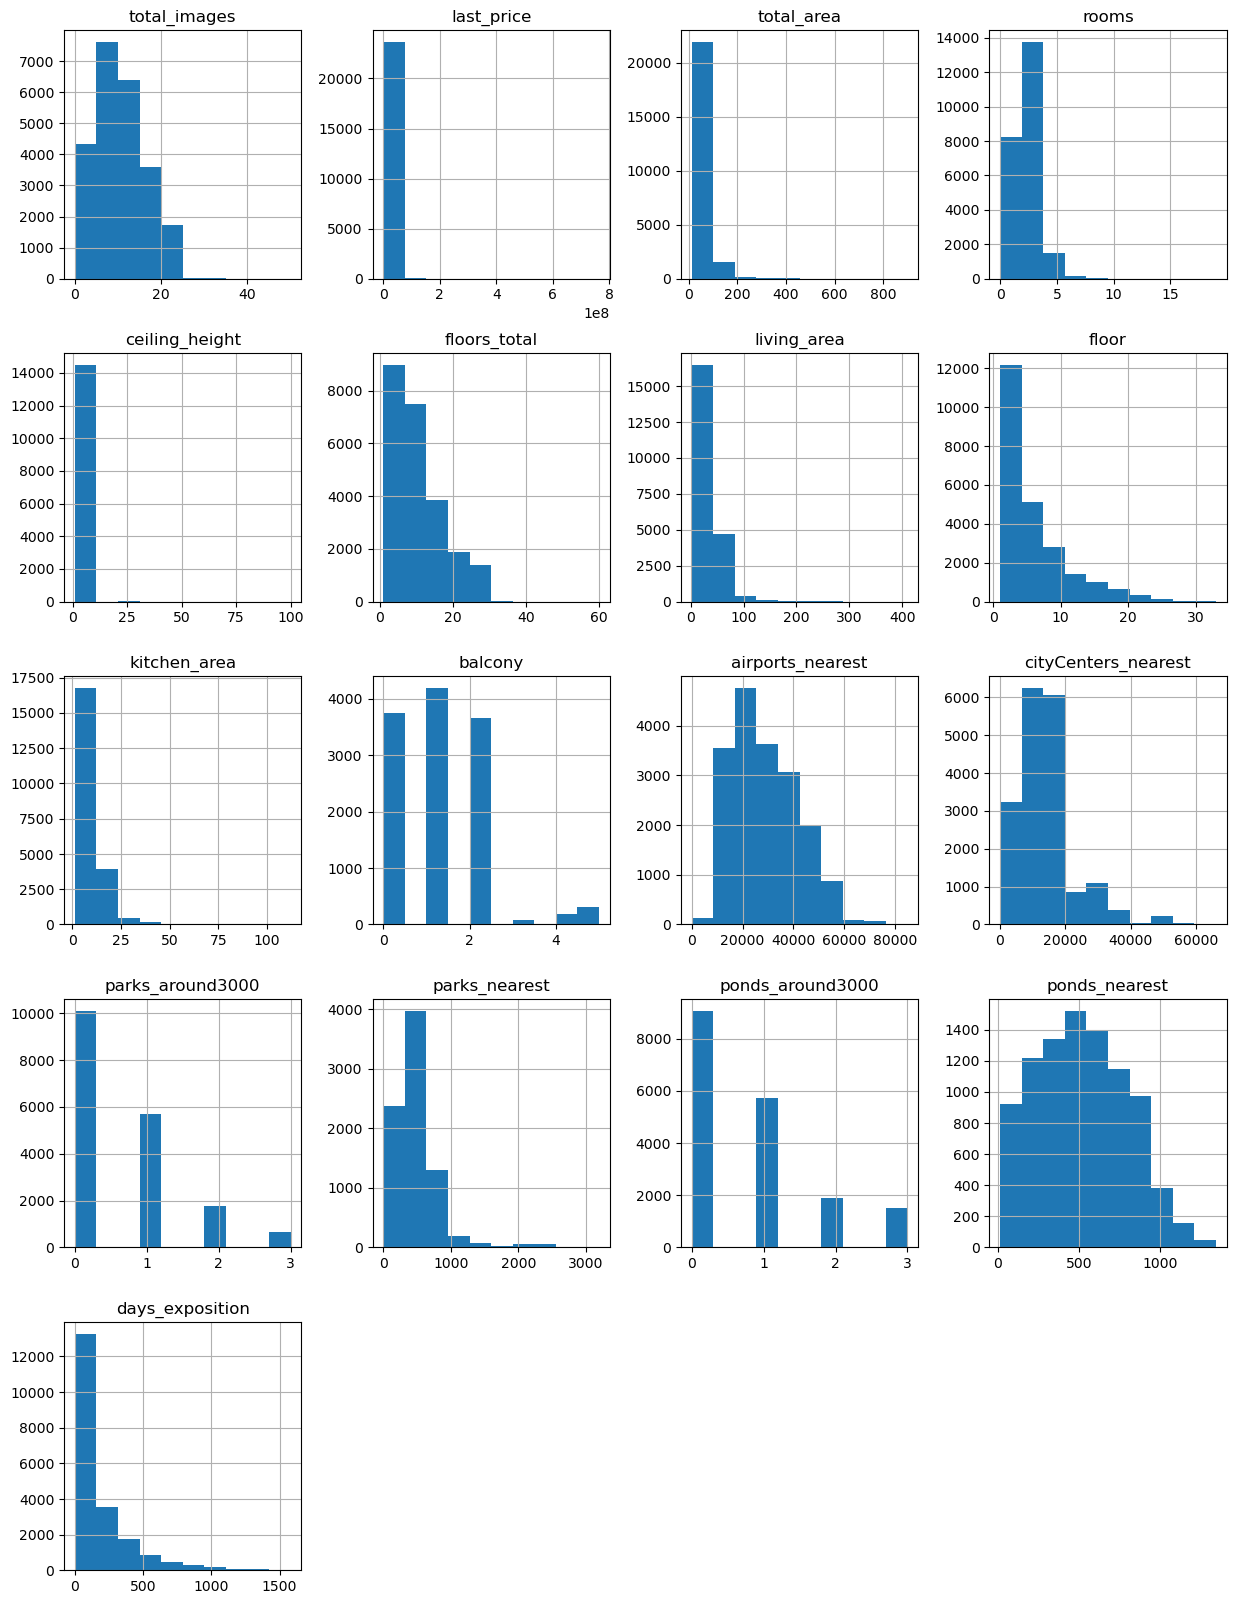

In [4]:
#график по всем данным
data.hist(figsize=(15, 20));

In [5]:
#проверка пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).astype(int).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,39
floors_total,0
living_area,8
floor,0
is_apartment,88


Проверка пропусков выявила 14 столбцов с пропусками. Для начала был выбран столбец "высота потолков" с пропушенными значениями.

In [7]:
# были изучены уникальные значения столбца "высота потолков" для выявления пропусков и аномалий
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [8]:
# пропуски в столбце "высота потолков" заменила средним значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
# после, чтобы убедиться, проверила количество пропущенных значений
print('Количество пропусков:', data['ceiling_height'].isna().sum())

Количество пропусков: 0


In [9]:
#поменяла столбец высота пололков на значения, относительно своего района
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Поскольку были найдены аномалии в высоте столбцов как 20, 27 и т.д., то такие данные были умножены на 0.1. Значение 100 было умножено на 0.01

In [10]:
#аномалии в столбце высота потолка были умножены на 0.1 и 0.01
for i in data['ceiling_height'].unique():
    if i >= 9:
        data.loc[(data['ceiling_height'] == i) & (data['ceiling_height'].notna()), 'ceiling_height'] = \
        data.loc[(data['ceiling_height'] == i),'ceiling_height']*0.1
    if i == 10:
        data.loc[(data['ceiling_height'] == i) & (data['ceiling_height'].notna()), 'ceiling_height'] = \
        data.loc[(data['ceiling_height'] == i),'ceiling_height']*0.01

#проверка значений столбца высота потолка
print(data['ceiling_height'].value_counts())

2.65    9871
2.50    3522
2.60    1647
2.70    1582
3.00    1112
        ... 
3.68       1
3.39       1
2.34       1
4.65       1
3.59       1
Name: ceiling_height, Length: 177, dtype: int64


Поскольку минимальной нормой в России считается высота потолка 2,4 метра, среднее находится в пределах 2,5-2,7 метра, а маскимум может быть 3 метра, то все значения ниже или выше этих пределов было удалены

In [11]:
# значения ниже или выше пределов 2-3 было удалены
data = data.loc[(data['ceiling_height'] >=2)& (data['ceiling_height'] <= 3)]
print(data['ceiling_height'].value_counts())
print('Максимальная высота потолка:', data['ceiling_height'].max())
print('Минимальная высота потолка:', data['ceiling_height'].min())

2.65    9871
2.50    3522
2.60    1647
2.70    1582
3.00    1112
        ... 
2.40       1
2.99       1
2.20       1
2.34       1
2.49       1
Name: ceiling_height, Length: 64, dtype: int64
Максимальная высота потолка: 3.0
Минимальная высота потолка: 2.0


(2.0, 3.0)

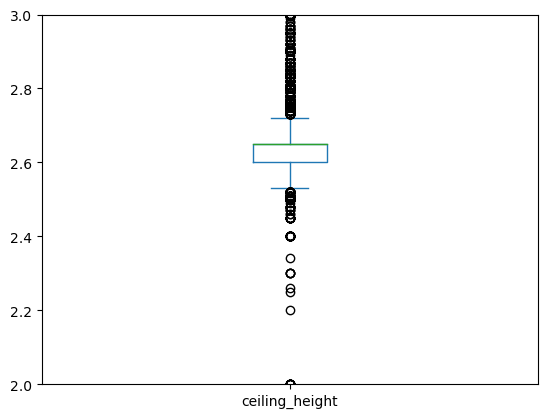

In [12]:
# проверка выбросов и аномалий в столбце высота потолков
data.ceiling_height.plot.box()
plt.ylim (2,3)

 Пропущенные значения в балконах были заменены на 0, предполагая, что они отсутствуют. Было также замечено, что тип столбца "количество балконов" был float64 и представлен как 1.0, 2.0 и т.д. В данном столбце тип float64 не уместен, поскольку количество балконов не может быть дробным, пожтому тип данных был изменен на целое число int.

In [13]:
# пропущенные значения в балконах были заменены на 0
data ['balcony'] = data['balcony'].fillna(0)
print('Количество пропусков:', data['balcony'].isna().sum())

Количество пропусков: 0


In [14]:
# изменение типа данных на целое число int
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].value_counts())

0    14045
1     4011
2     3597
5      294
4      167
3       73
Name: balcony, dtype: int64


In [15]:
# были изучены уникальные значения столбца "апартаменты" для выявления пропусков и количество значений в каждом
print(data['is_apartment'].unique())
print('Количество пропусков:', data['is_apartment'].isna().sum())

[nan False True]
Количество пропусков: 19617


In [16]:
# пропушенные значения были заменены средним значением
for i in data['studio'].unique():
    data.loc[(data['studio'] == i) & (data['is_apartment'].isna()), 'is_apartment'] = \
    data.loc[(data['studio'] == i),'is_apartment'].median()

In [17]:
# для уточнения было проверено количество пропусков
print('Количество пропусков:', data['is_apartment'].isna().sum())
#тип данных был изменен на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

Количество пропусков: 0


In [18]:
# для уточнения были проверены уникальные значения и их количество
# количество False включила пропущенные значения
print(data['is_apartment'].unique())
print(data['is_apartment'].value_counts())

[False  True]
False    22155
True        32
Name: is_apartment, dtype: int64


*Выводы:* Причиной пропусков в столбце апартаментов скорее всего обуславливается тем, что являются квартирами-студиями. Поскольку данные заполняются пользователями, они скорее всего не понимали категоризацию типов жилья, намеренно скрыли или случайно пропустили. Поэтому пропущенные значения были заполнены медианой. Тем самым, все пропущенные значения вошли в False.


In [19]:
# были рассмотрены ближайшие парки по расстоянию и максимальное и минимальное расстояние до ближайшего парка
print('Максимальное расстояние до ближайшего парка:', data['parks_nearest'].max())
print('Минимальное расстояние до ближайшего парка:', data['parks_nearest'].min())

Максимальное расстояние до ближайшего парка: 3190.0
Минимальное расстояние до ближайшего парка: 1.0


In [20]:
# также были рассмотрены ближайшие водоёмы по расстоянию и максимальное и минимальное расстояние до ближайшего водоёма
print('Максимальное расстояние до ближайшего водоёма:', data['ponds_nearest'].max())
print('Минимальное расстояние до ближайшего водоёма:', data['ponds_nearest'].min())

Максимальное расстояние до ближайшего водоёма: 1344.0
Минимальное расстояние до ближайшего водоёма: 13.0


In [21]:
# пропущенные значения в столбцах число парков и водоёмов в радиусе 3 км были заменены на основе названия населённого пункта 
#и учитывая максимальное расстояние до ближайшего парка или водоёма
city_with_parks = data.loc[(~(data['parks_around3000'].isna())), 'locality_name'].unique()
city_with_ponds = data.loc[(~(data['ponds_around3000'].isna())), 'locality_name'].unique()
for area in data.loc[((data['parks_around3000'].isna())), 'locality_name'].unique():
    if area not in city_with_parks:
        data.loc[(data['locality_name'] == area),'parks_around3000'] = 0
        data.loc[(data['locality_name'] == area),'parks_nearest'] = 20000
for area in data.loc[((data['ponds_around3000'].isna())), 'locality_name'].unique():
    if area not in city_with_parks:
        data.loc[(data['locality_name'] == area),'ponds_around3000'] = 0
        data.loc[(data['locality_name'] == area),'ponds_nearest'] = 20000

In [22]:
# оставшие пропущенные значение в количестве парков и водоемов были заменены на 0, считая их находящими дальше радиуса 3 км
data ['parks_around3000'] = data ['parks_around3000'].fillna(0)
print('Количество пропущенных значений в количестве парков:', data['parks_around3000'].isna().sum())

data ['ponds_around3000'] = data ['ponds_around3000'].fillna(0)
print('Количество пропущенных значений в количестве водоёмов:', data['ponds_around3000'].isna().sum())

Количество пропущенных значений в количестве парков: 0
Количество пропущенных значений в количестве водоёмов: 0


*Выводы:* Пропуски в столбцах расстояние до ближайшего парка и до водоема, скорее всего являются техническими. Пропуски возможно находятся в селах и поселка, где не всегда проложены точные картографические данные. Поэтому пропущенные значения в столбцах были заменены на основе названия населённого пункта и учитывая максимальное расстояние до ближайшего парка или водоёма. Оставшие пропущенные значение скорее всего находятся дальше радиуса 3 км, поэтому были заменены на 0.

In [23]:
# изменение типа данных на целое число int
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22187 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22187 non-null  int64  
 1   last_price            22187 non-null  float64
 2   total_area            22187 non-null  float64
 3   first_day_exposition  22187 non-null  object 
 4   rooms                 22187 non-null  int64  
 5   ceiling_height        22187 non-null  float64
 6   floors_total          22101 non-null  float64
 7   living_area           20367 non-null  float64
 8   floor                 22187 non-null  int64  
 9   is_apartment          22187 non-null  bool   
 10  studio                22187 non-null  bool   
 11  open_plan             22187 non-null  bool   
 12  kitchen_area          20011 non-null  float64
 13  balcony               22187 non-null  int32  
 14  locality_name         22142 non-null  object 
 15  airports_nearest   

In [24]:
#проверка значений в столбце общая площадь
print(data['total_area'].value_counts())

45.00    414
42.00    381
31.00    346
44.00    342
60.00    329
        ... 
96.28      1
21.70      1
52.68      1
19.00      1
76.75      1
Name: total_area, Length: 1995, dtype: int64


In [25]:
# были удалены ошибочные данные
data['anomaly'] = data['total_area'] - data['living_area'] - data['kitchen_area']
data = data[data['anomaly']>0]
data = data.drop(columns ='anomaly')
print(data['total_area'].value_counts())

45.00     366
42.00     326
44.00     299
31.00     296
60.00     294
         ... 
35.24       1
130.21      1
58.71       1
60.75       1
66.86       1
Name: total_area, Length: 1732, dtype: int64


In [26]:
# была рассмотрена максимальная и минимальная общая площадь квартиры в квадратных метрах 
print('Максимальная общая площадь квартиры в квадратных метрах:', data['total_area'].max())
print('Минимальная общая площадь квартиры в квадратных метрах:', data['total_area'].min())

Максимальная общая площадь квартиры в квадратных метрах: 900.0
Минимальная общая площадь квартиры в квадратных метрах: 14.0


In [27]:
# пропущенные значения в столбцах жилая площадь и площадь кухни были заменены на основе общей площади квартиры 
#и учитывая максимальную общую площадь квартиры в квадратных метрах
kitchen = data.loc[(~(data['kitchen_area'].isna())), 'total_area'].unique()
living = data.loc[(~(data['living_area'].isna())), 'total_area'].unique()
for t in data.loc[((data['kitchen_area'].isna())), 'total_area'].unique():
    if area not in city_with_parks:
        data.loc[(data['total_area'] == t),'kitchen_area'] = 0
        data.loc[(data['total_area'] == t),'total_area'] = 900
for t in data.loc[((data['living_area'].isna())), 'total_area'].unique():
    if t not in city_with_parks:
        data.loc[(data['total_area'] == t),'living_area'] = 0
        data.loc[(data['total_area'] == t),'total_area'] = 900

*Вывод:* Пропущенные значения и аномалии в столбцах жилая площадь и площадь кухни были заменены на основе общей площади квартиры и учитывая максимальную общую площадь квартиры в квадратных метрах.Поскольку данные были добавлены самими пользователями, то причины появления пропусков отсутсвия у них таких данных, не имении данных при заполенении, намеренное скрытие или случайный пропуск.

In [28]:
# пропущенные значение в количестве дней размещения объявления были заменены на 0
data ['days_exposition'] = data ['days_exposition'].fillna(0)
print('Количество пропущенных значений в количестве дней размещения объявления:', data['parks_around3000'].isna().sum())
# тип данных был изменен на целое число int
data['days_exposition'] = data['days_exposition'].astype('int')

Количество пропущенных значений в количестве дней размещения объявления: 0


*Вывод:* Пропущенные значение в количестве дней размещения объявления были заменены на 0, поскольку нету данных о снятии даты объявлений, только дата публикации. Пропуски скорее всего были случайными по техническим причинам (ошибка, отсутсвие обновленных данных). </div>

In [29]:
# в конце были проверены все пропущенные значения
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              39
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             35
airports_nearest        4564
cityCenters_nearest     4547
parks_around3000           0
parks_nearest           8758
ponds_around3000           0
ponds_nearest           7833
days_exposition            0
dtype: int64


In [30]:
# проверка на явные дубликаты
data.duplicated().sum()

0

In [31]:
#были удалены пропуски в названиях населенных пунктов
data = data.dropna(subset=['locality_name'])
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              38
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4558
cityCenters_nearest     4541
parks_around3000           0
parks_nearest           8735
ponds_around3000           0
ponds_nearest           7817
days_exposition            0
dtype: int64

In [32]:
#в названиях населенных пунктов были измененые "ё" на "е" в словах "поселок"
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
# "городской посёлок" и "городской поселок" были изменены на «поселок городского типа»
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
# также'поселок станции' был изменен на'посёлок при железнодорожной станции' 
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'посёлок при железнодорожной станции')
# и все "ё" были измененые на "е"
data['locality_name'] = data['locality_name'].str.replace('ё','e')
#проверка изменений названий
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок городского типа Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Колпино' 'Гатчина' 'деревня Фeдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'деревня Куттузи'
 'Сестрорецк' 'поселок Аннино' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный'
 'деревня Старая' 'деревня Лесколово' 'село Путилово' 'Ивангород' 'Мурино'
 'Сланцы' 'Шлиссельбург' 'Сясьстрой' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры'
 'поселок городского типа Рощино' 'Кириши' 'Луга' 'Во

*Вывод:* Пропуски столбца название населенного пункта были заменены на 0, а найденные дубликаты заменены на правильное написание названий. Пропуски скорее всего были случайными по техническим причинам (ошибка, отсутсвие обновленных данных), а дубликаты появились из-за того, что пользователи сами вводили название населенного пункта.

In [33]:
#изменение типа данных столбца последней цены
data['last_price'] = data['last_price'].astype('int')
print(data['last_price'].value_counts())

4500000    301
3500000    250
4200000    237
4300000    231
3600000    229
          ... 
3395000      1
7253540      1
7098000      1
3455000      1
9470000      1
Name: last_price, Length: 2354, dtype: int64


*Вывод:* Данные столбца "цена на момент снятия с публикации" оказались типа данных float64, что не уместно для цены недвижимости. Тип данных этого столбца был изменен на целое число int </div>

**Вывод по пропускам данных:** 
- Пропуски были в 14 столбцах. Поскольку данные либо добавлены самими пользователями, либо картографически, то причины появления пропусков в этих категориях могут быть случайными по техническим причинам (ошибка, отсутсвие обновленных данных) или по причине отсутсвия таких данных у самих пользователей. К примеру, больше всего пропусков в столбце определения является ли жилое помещение апартаментом. Эти данные заполняются пользователями и причиной скорее всего является не понимание в категоризации типов жилья, намеренное скрытие или случайный пропуск. Другие столбцы с большими количествами пропусков являются столбцы расстояние до ближайшего парка и до водоема, скорее всего причина здесь техническая и пропуски возможно находятся в селах и поселка, где не всегда проложены точные картографические данные. Также много пропусков в количестве балконов, который скорее всего не был заполнен пользователем по причине его отсутствия или по ошибке.

**Вывод по изменению типов данных:** 
- Тип 6 столбцов были неправильно представлены, поэтому измененые в зависимости от их дальнейшего использования. К примеру количесто этажей и балконов, парков,водоемов и количества дней размещения дней были переведны с float64 на int. В этих случая идет перечисление и количество не может быть дробным. К тому же апартаменты (булев тип) были заменены на bool, поскольку изначально данные были заявлены как булевые и все значения разделены на True и False.

**Вывод по неявным дубликатами:** 
- Среди уникальные значения в столбце с названиями были найдены неявные дубликаты, которые были устранены.

**Вывод по особенности в данных:** 
- Были найдены аномалии в высоте столбцов как 20, 27 и т.д., которые были умножены на 0.1 и значение 100 был умножено на 0.01. С помощью value_counts() были определены редкие и выбивающиеся значения. Поскольку минимальной нормой в России считается высота потолка 2,4 метра, среднее находится в пределах 2,5-2,7 метра, а максимум может быть 3 метра, то все значения ниже или выше этих пределов было удалены.

In [34]:
#для нахождения цены одного квадратного метра, цену на момент снятия с публикации я разделила на общую площадь квартиры в м²
data['one_m_price'] = data['last_price']/data['total_area']

In [35]:
#для дня недели, месяца и года, сначала обработала эти временные данные в столбце 'first_day_exposition' по формату, 
#а после для каждого создала новый столбец 
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['weekday']= pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month']= pd.DatetimeIndex(data['first_day_exposition']).month
data['year']= pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_m_price,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,0,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,0,20000.0,0,20000.0,55,95065.789474,0,9,2018
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,19143.0,0,NaN,0,NaN,155,99195.710456,3,11,2017


In [36]:
#изменение типа данных
data ['Y/M/D'] = data['first_day_exposition'].astype('datetime64[M]')

In [37]:
#для разделения этажей квартир на типы, созадала функцию с помощью def и дала значения — «первый», «последний», «другой»
def floor_type(floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        if floor['floor'] == floor ['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [38]:
#новый столбец для типов этажей
data['floor_names'] = data.apply(floor_type, axis=1)

In [39]:
#новый столбец для расстояние до центра города в километрах, где перевела м в км 
data['city_centers_km'] = (data['cityCenters_nearest']*0.001).round()
#проверкf новых столбцов 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_m_price,weekday,month,year,Y/M/D,floor_names,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,0,120370.370370,3,3,2019,2019-03-01,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,82920.792079,1,12,2018,2018-12-01,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,92785.714286,3,8,2015,2015-08-01,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,0,20000.0,55,95065.789474,0,9,2018,2018-09-01,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,0,NaN,155,99195.710456,3,11,2017,2017-11-01,другой,19.0


### Исследовательский анализ данных

#### Различные параметры объектов и их гистограммы

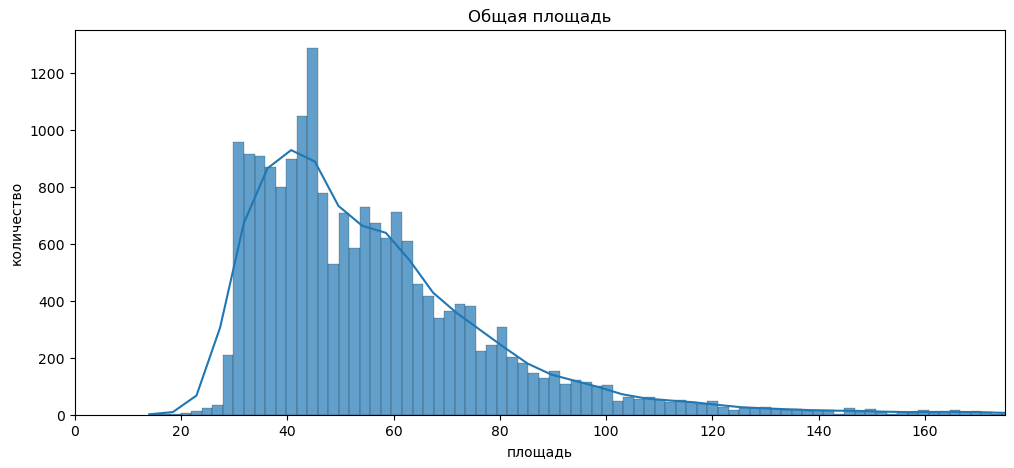

In [40]:
#график общей площади
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['total_area'],ax=ax, kde=True, alpha = 0.7).set(title = "Общая площадь")
ax.set_xlim(0, 175)
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show();

*Вывод:* больше всего продают квартиры с общей площадью в срезе от 40 до 65 кв.м. </div>

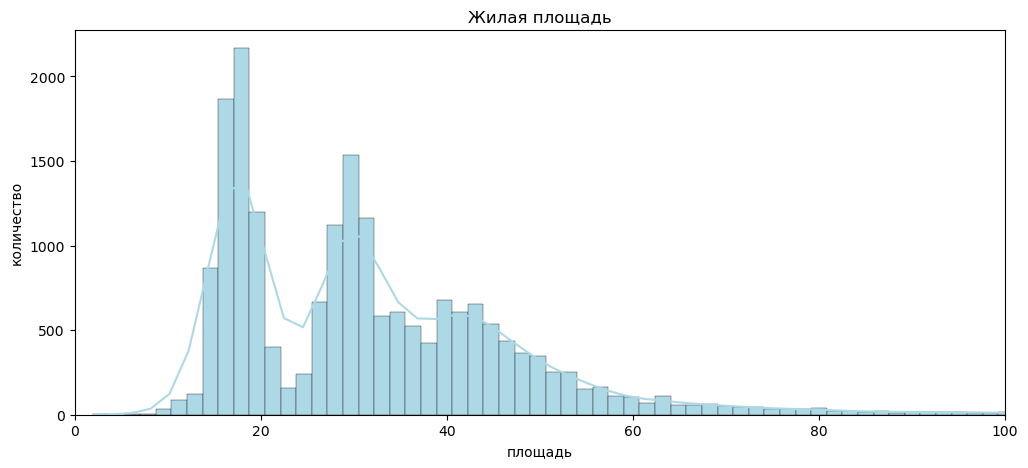

In [41]:
#график жилой площади 
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['living_area'],ax=ax, kde=True, color='lightblue', alpha = 1.0).set(title = "Жилая площадь")
ax.set_xlim(0, 100)
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show();

*Вывод:* Больше всего продавались квартиры с жилой площадью в срезе от 14 до 30-40 кв.м.

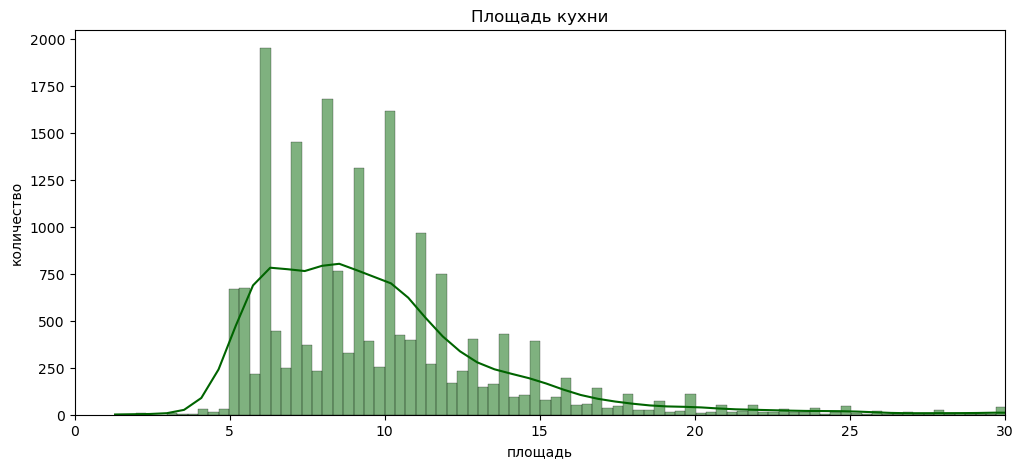

In [42]:
#график площади кухни
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['kitchen_area'],ax=ax, kde=True, color ='darkgreen', alpha = 0.5).set(title = "Площадь кухни")
ax.set_xlim(0, 30)
plt.xlabel('площадь')
plt.ylabel('количество')
plt.show();

*Вывод:* Больше всего продавались квартиры с площадью кухни около 10 кв.м.

In [43]:
#основные статистические характеристики данных last_price
data.last_price.describe()

count    1.944500e+04
mean     5.841421e+06
std      7.226825e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.315000e+06
max      4.200000e+08
Name: last_price, dtype: float64

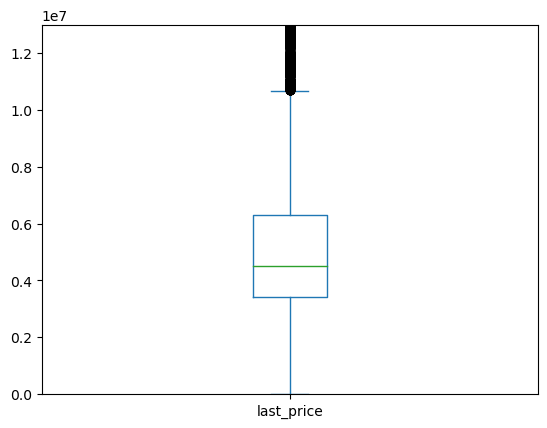

In [44]:
#проверка выбросов в last_price
data.last_price.plot.box()
plt.ylim(0, 13000000);

In [45]:
#чтобы убрать выборсы были подсчитаны квантили 0.25 и 0.5
q1= data.last_price.quantile(0.25)
q3= data.last_price.quantile(0.5)
iqr= q1-q3
#после сделала срез, убрав квартиры с высокой стоимостью, которые в небольшом количестве
data = data.query('last_price <= @q3 + 1.5 * @q3')

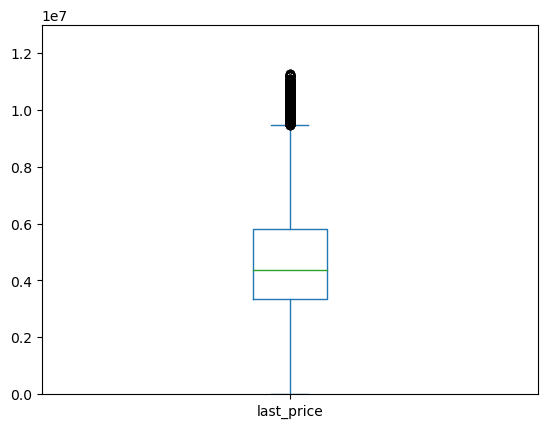

In [46]:
#еще раз проверила диаграмму размаха
data.last_price.plot.box()
plt.ylim(0, 13000000);

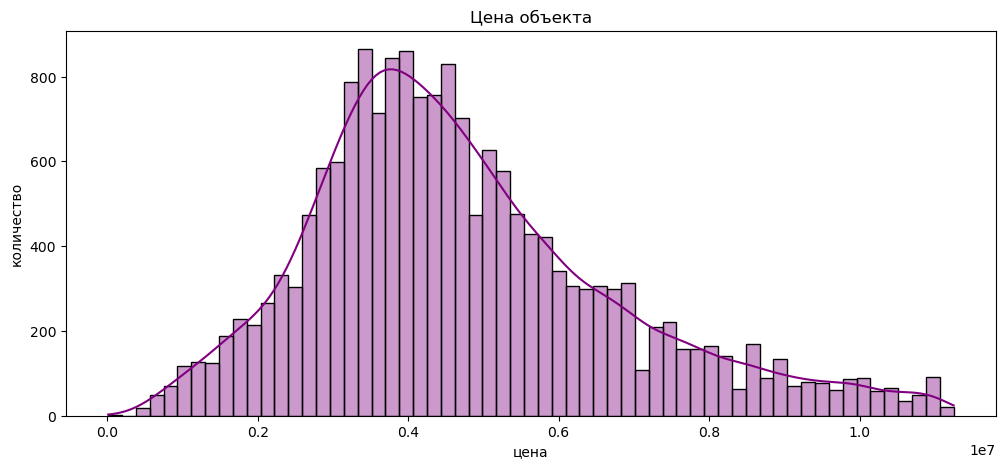

In [47]:
#график площади кухни
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['last_price'],ax=ax, kde=True, color='purple', alpha = 0.4).set(title = "Цена объекта")
plt.xlabel('цена')
plt.ylabel('количество')
plt.show();

*Вывод:* Гистограмма не показала распределение цены объекта, поэтому я использовала диаграмму размаха, чтобы найти проблему. Диаграмма размаха показала выбросы в виде нескольких дорогих квартир, которые далее были отброшены, чтобы сфокусироваться на более популярные квартиры. После этого гистограмма показала, что цена квартир в основном больше 6-ти млн.рублей.

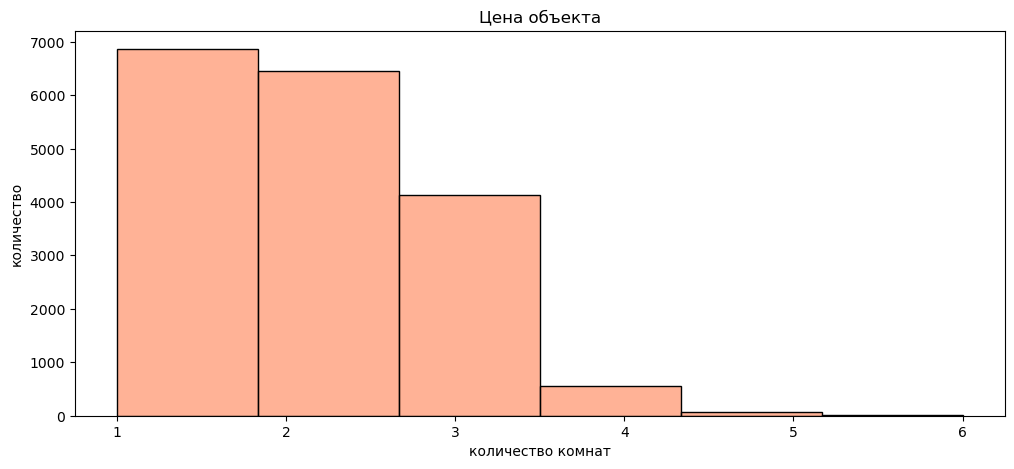

In [48]:
#график количества комнат
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['rooms'],ax=ax, color='coral', alpha = 0.6, bins=6).set(title = "Цена объекта")
plt.xlabel('количество комнат')
plt.ylabel('количество')
plt.show();

*Вывод:* Большей популярностью пользуются 2х-3х комнатные квартиры

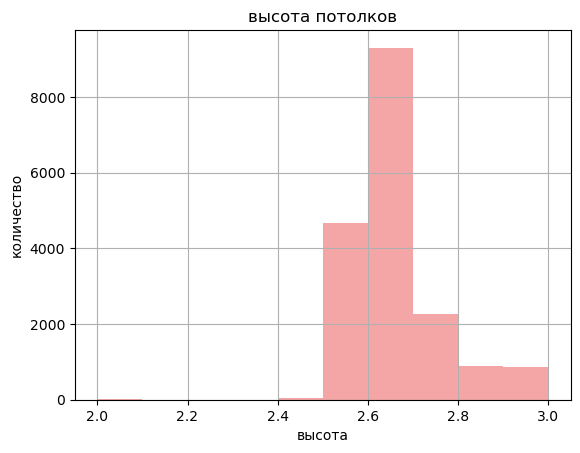

In [49]:
#график высоты потолков
data['ceiling_height'].plot(kind='hist', title ='высота потолков', color='lightcoral', alpha=0.7, grid=True)
plt.xlabel("высота")
plt.ylabel("количество");

*Вывод:* Высота потолков в основном от 2,6-2,7 метра

In [50]:
data_floors = data['floor_names'].value_counts()
data_floors

другой       13271
последний     2473
первый        2329
Name: floor_names, dtype: int64

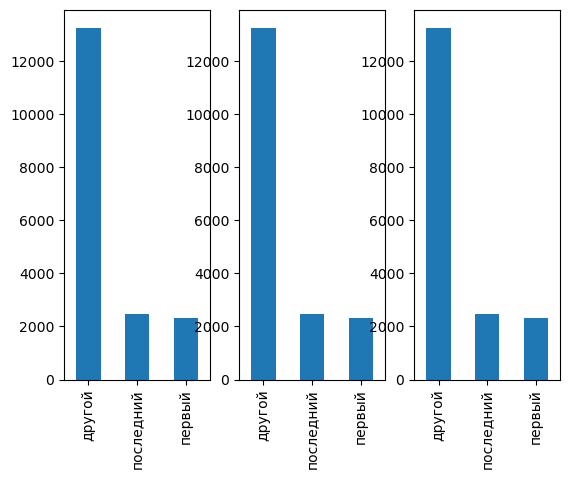

In [51]:
#график предпочитаемых этажей
fig, axs = plt.subplots(1, 3)
data['floor_names'].value_counts().plot(ax=axs[0], kind = 'bar')
data['floor_names'].value_counts().plot(ax=axs[1], kind = 'bar')
data['floor_names'].value_counts().plot(ax=axs[2], kind = 'bar');

*Вывод:* чаще всего покупатели предпочитают любые этажи кроме первых и последних

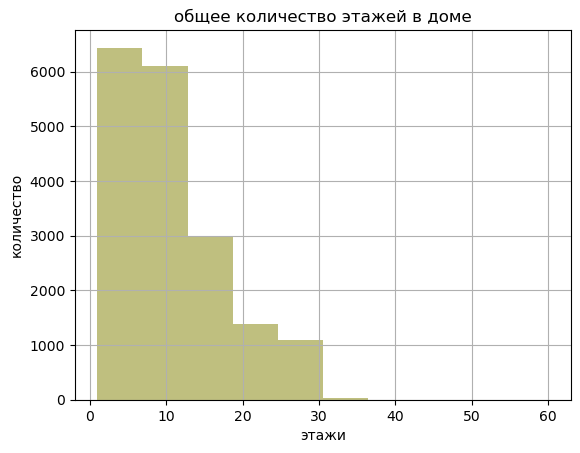

In [52]:
data['floors_total'].plot(kind='hist', title ='общее количество этажей в доме', color='olive', alpha=0.5, grid=True)
plt.xlabel("этажи")
plt.ylabel("количество");

*Вывод:* чаще всего встречаются дома с общим количеством около 7 этажей

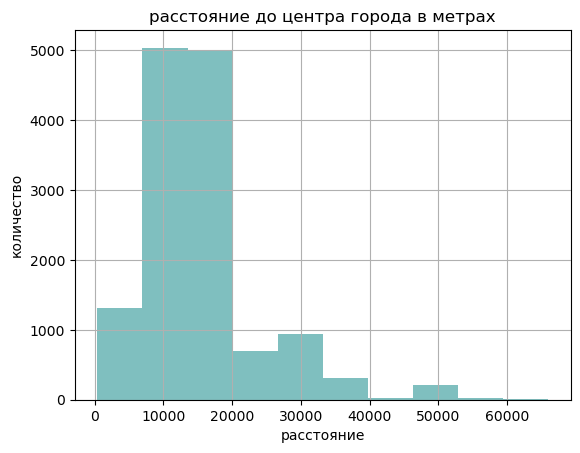

In [53]:
data['cityCenters_nearest'].plot(kind='hist', title ='расстояние до центра города в метрах', color='teal', alpha=0.5, grid=True)
plt.xlabel("расстояние")
plt.ylabel("количество");


*Вывод:* расстояние до центра города от дома у покупателей в основном составляло от 9000 до 12000 метров

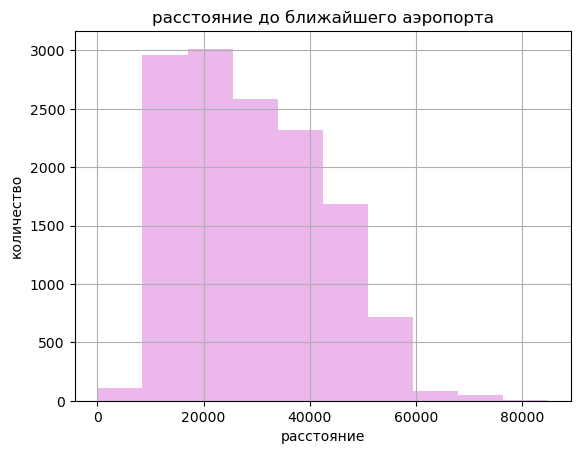

In [54]:
data['airports_nearest'].plot(kind='hist', title ='расстояние до ближайшего аэропорта', color='orchid', alpha=0.5, grid=True)
plt.xlabel("расстояние")
plt.ylabel("количество");


*Вывод:* расстояние до ближайшего аэропорта  составляло от 19000 до 23000 метров

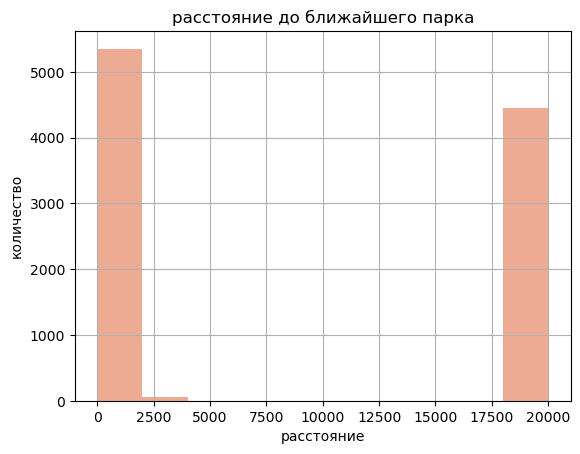

In [55]:
data['parks_nearest'].plot(kind='hist', title ='расстояние до ближайшего парка', color='darksalmon', alpha=0.8, grid=True)
plt.xlabel("расстояние")
plt.ylabel("количество");


*Вывод:* расстояние до ближайшего парка составляло в основном до 2400 метров

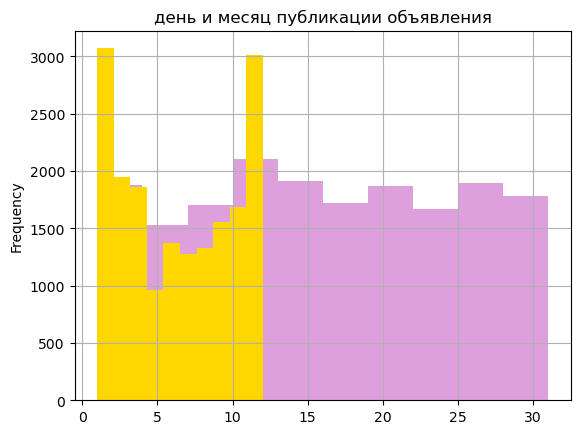

In [56]:
data['date']= pd.DatetimeIndex(data['first_day_exposition']).day
data['date'].plot(kind='hist', title ='день и месяц публикации объявления',  color='plum', grid=True);
data['month'].plot(kind='hist', title ='день и месяц публикации объявления',  color='gold', grid=True);

*Вывод:* чаще всего объявления публиковались в первых неделях начала и конца года (январь и декабрь) 

#### Скорость продаваемости квартир

In [57]:
print('Среднее по количеству дней размещения объявления:', data['days_exposition'].mean())
print('Среднее по количеству дней размещения объявления:', data['days_exposition'].median())

Среднее по количеству дней размещения объявления: 153.42267470812814
Среднее по количеству дней размещения объявления: 75.0


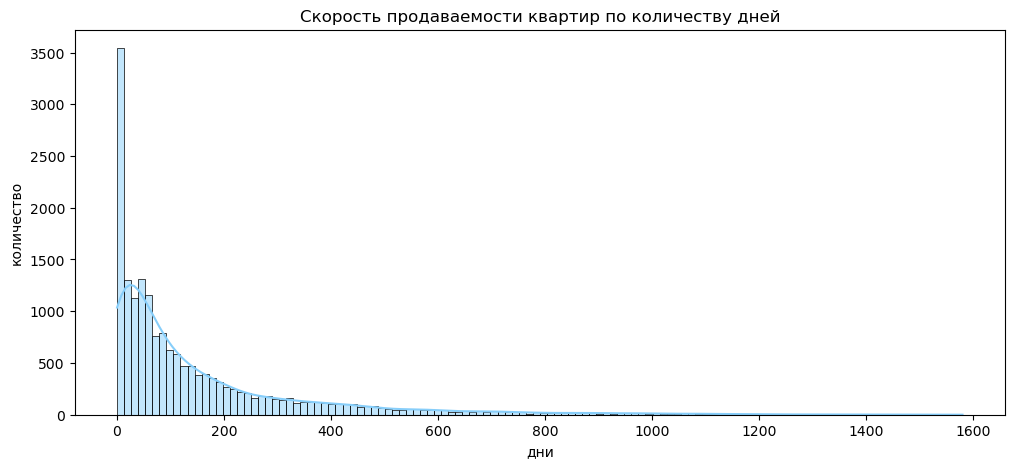

In [58]:
#график скорости продаваемости квартир
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data['days_exposition'],ax=ax, kde=True, color ='lightskyblue').set(title = "Скорость продаваемости квартир по количеству дней")
plt.xlabel('дни')
plt.ylabel('количество')
plt.show();

In [59]:
data.days_exposition.describe()

count    18073.000000
mean       153.422675
std        205.215693
min          0.000000
25%         23.000000
50%         75.000000
75%        196.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

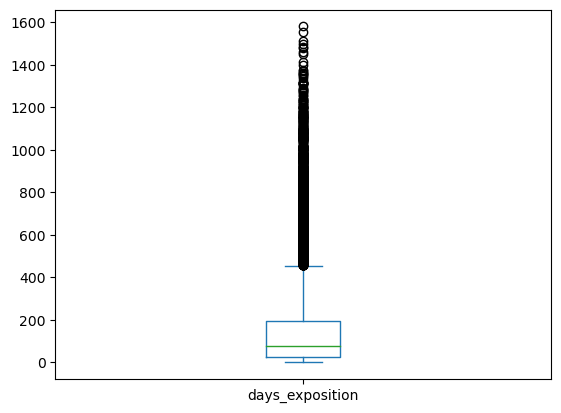

In [60]:
#поскольку на гистограмме были замечены выбросы, была построена диаграмма размаха
data.days_exposition.plot.box()

<AxesSubplot:>

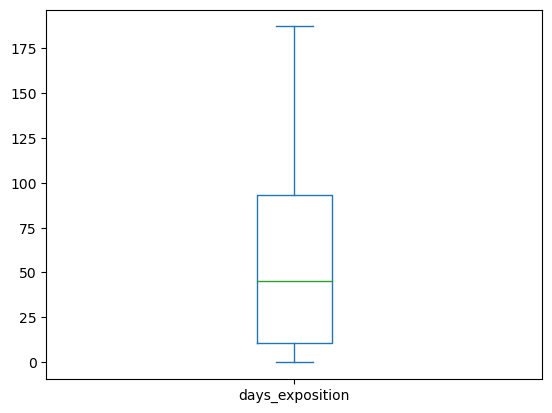

In [61]:
#чтобы убрать выборсы были подсчитаны квантили 0.25 и 0.5
q1= data.days_exposition.quantile(0.25)
q3= data.days_exposition.quantile(0.5)
iqr= q1-q3
#после сделала срез, убрав квартиры с высокой стоимостью, которые в небольшом количестве
data_filtered = data.query('days_exposition <= @q3 + 1.5 * @q3')
data_filtered.days_exposition.plot.box()

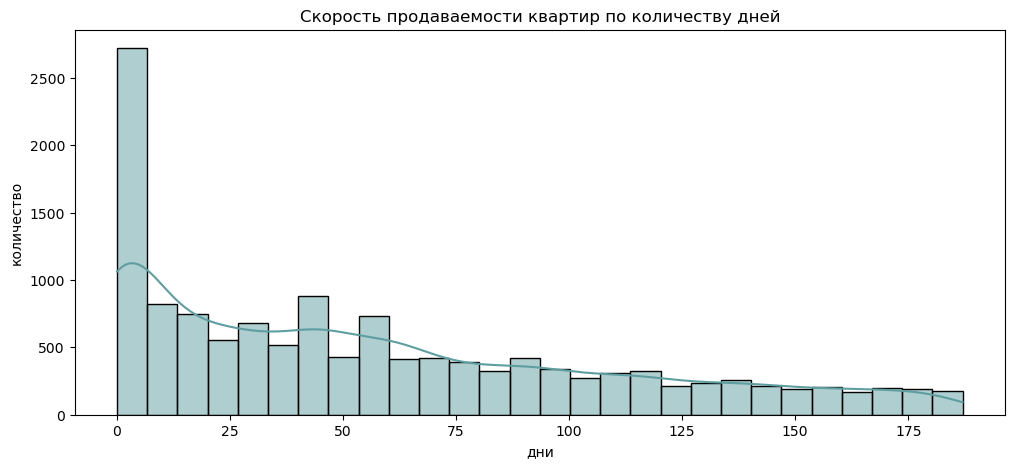

In [62]:
#график скорости продаваемости квартир
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = data_filtered['days_exposition'],ax=ax, kde=True, color ='cadetblue').set(title = "Скорость продаваемости квартир по количеству дней")
plt.xlabel('дни')
plt.ylabel('количество')
plt.show();

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

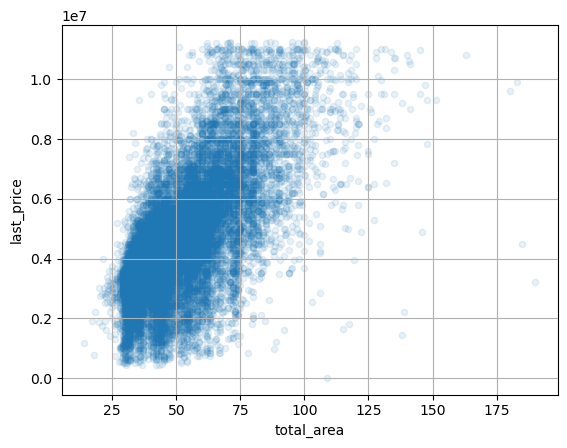

In [63]:
# и посмотрела результаты в диаграмме рассеивания
data.plot(x='total_area', y='last_price', kind='scatter',alpha =0.1, grid=True)

*Выводы:* Согласно данным, в среднем объявление квартиры стоит 156 дней, а медиана составляет 77 дней. Самые быстрые продажи были осуществлены в тот же день и в течение 30-40 дней. А дольше всего объявления висели около 1 года, но это единичные случаи.

#### Факторы влияния на общую стоимость объекта

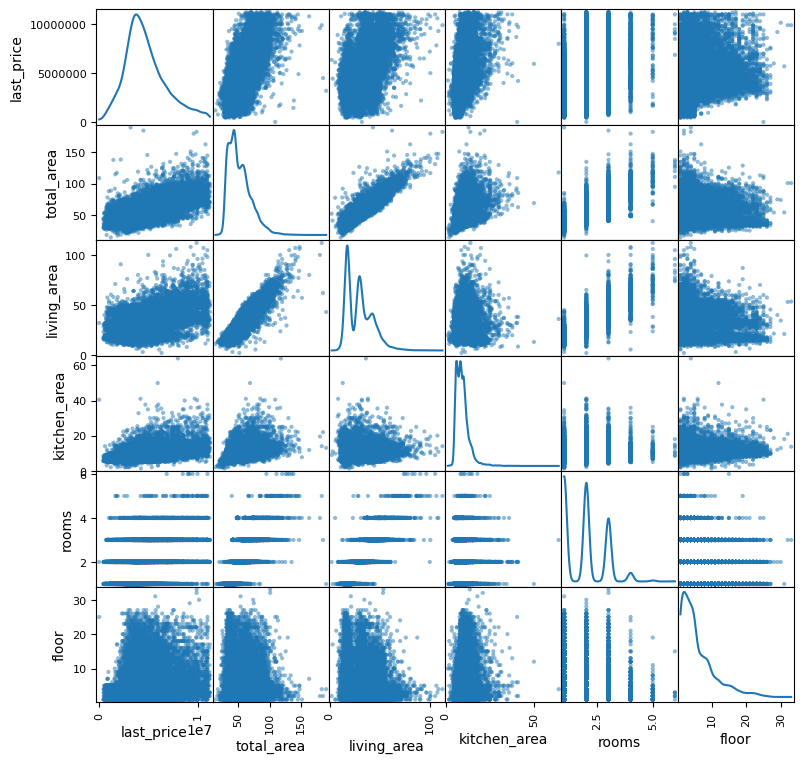

In [64]:
#для выявления какие факторы больше всего влияют на общую стоимость объекта была применена матрица диаграмм рассеяния
data_matrix =  ['last_price', 'total_area','living_area', 'kitchen_area', 'rooms', 'floor']
pd.plotting.scatter_matrix(data[data_matrix], diagonal = 'kde', figsize=(9, 9));

In [65]:
#для выявления какие факторы больше всего влияют на общую стоимость объекта была использована функция corr() на все значения
data[data_matrix].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor
last_price,1.000000,0.671339,0.540597,0.475200,0.428064,0.182379
total_area,0.671339,1.000000,0.909279,0.417250,0.802118,-0.006634
living_area,0.540597,0.909279,1.000000,0.112608,0.906517,-0.128844
kitchen_area,0.475200,0.417250,0.112608,1.000000,0.017417,0.251141
rooms,0.428064,0.802118,0.906517,0.017417,1.000000,-0.163777
floor,0.182379,-0.006634,-0.128844,0.251141,-0.163777,1.000000


Зависимость цены от общей площади: 0.6713394280843487
Зависимость цены от жилой площади: 0.540596667427135
Зависимость цены от площади кухни: 0.4752004464807393


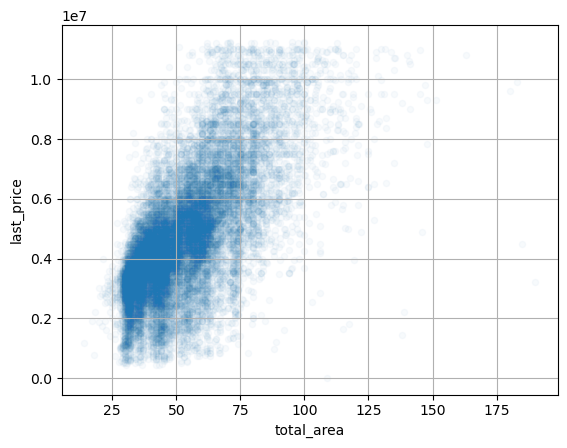

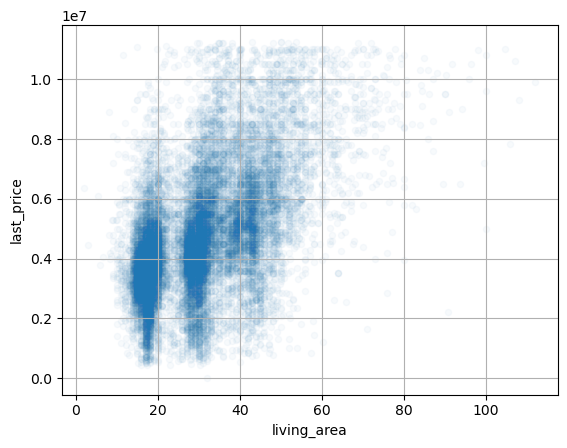

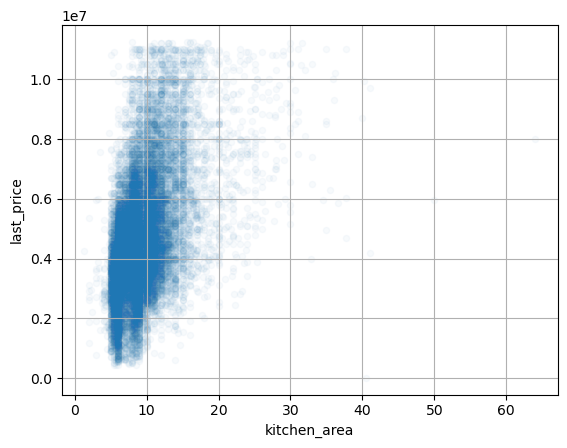

In [66]:
price_vs_total = data.plot(x='total_area', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от общей площади:', data['total_area'].corr(data['last_price']))
price_vs_living = data.plot(x='living_area', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от жилой площади:', data['living_area'].corr(data['last_price']))
price_vs_living = data.plot(x='kitchen_area', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от площади кухни:', data['kitchen_area'].corr(data['last_price']))

Зависимость цены от количества комнат: 0.42806370900763085
Зависимость цены от этажа, на котором расположена квартира: 0.18237924476732476


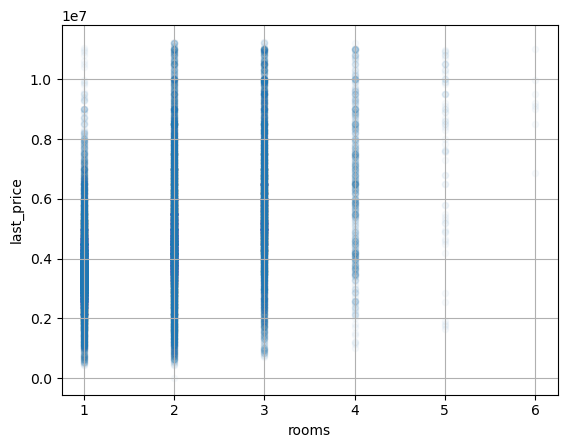

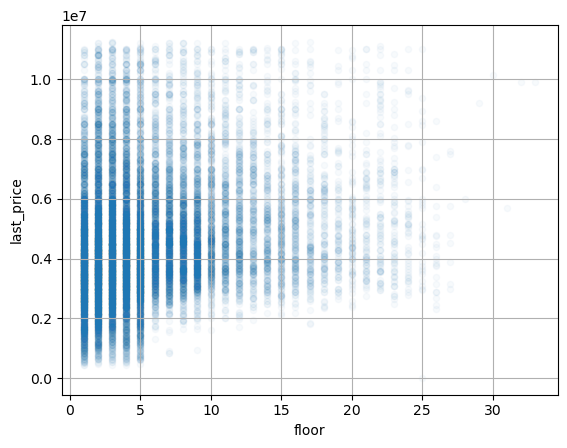

In [67]:
price_vs_rooms = data.plot(x='rooms', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от количества комнат:', data['rooms'].corr(data['last_price']))
price_vs_floor = data.plot(x='floor', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от этажа, на котором расположена квартира:', data['floor'].corr(data['last_price']))

In [68]:
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month

Зависимость цены от даты размещения: 0.01732901341394776


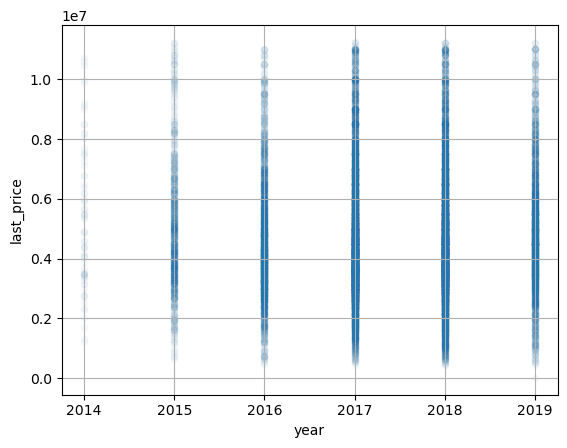

In [69]:
price_vs_date = data.plot(x='year', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от даты размещения:', data['year'].corr(data['last_price']))
#pd.plotting.scatter_matrix(price_vs_date, figsize=(9, 9))

Зависимость цены от даты размещения: 0.002978874560604376


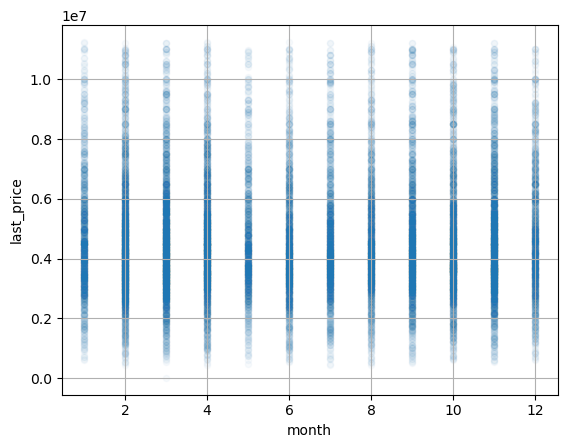

In [70]:
price_vs_date = data.plot(x='month', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от даты размещения:', data['month'].corr(data['last_price']))
#pd.plotting.scatter_matrix(price_vs_date, figsize=(9, 9))

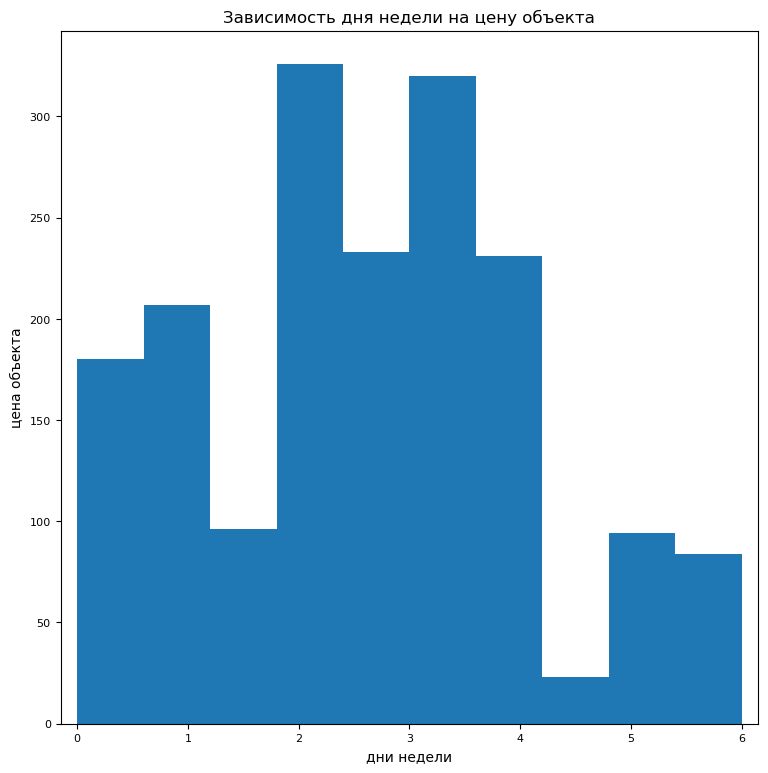

In [71]:
price_vs_dates = data.pivot_table(index='last_price', values='weekday')
pd.plotting.scatter_matrix(price_vs_dates, figsize=(9, 9))
plt.xticks(rotation=360)
plt.title("Зависимость дня недели на цену объекта")
plt.xlabel('дни недели')
plt.ylabel('цена объекта')
plt.show();

*Выводы:* Корреляция общей (полной) стоимости объекта показала, что больше всего на цену влияет общая площадь квартиры, в особенности его жилищная площадь. 

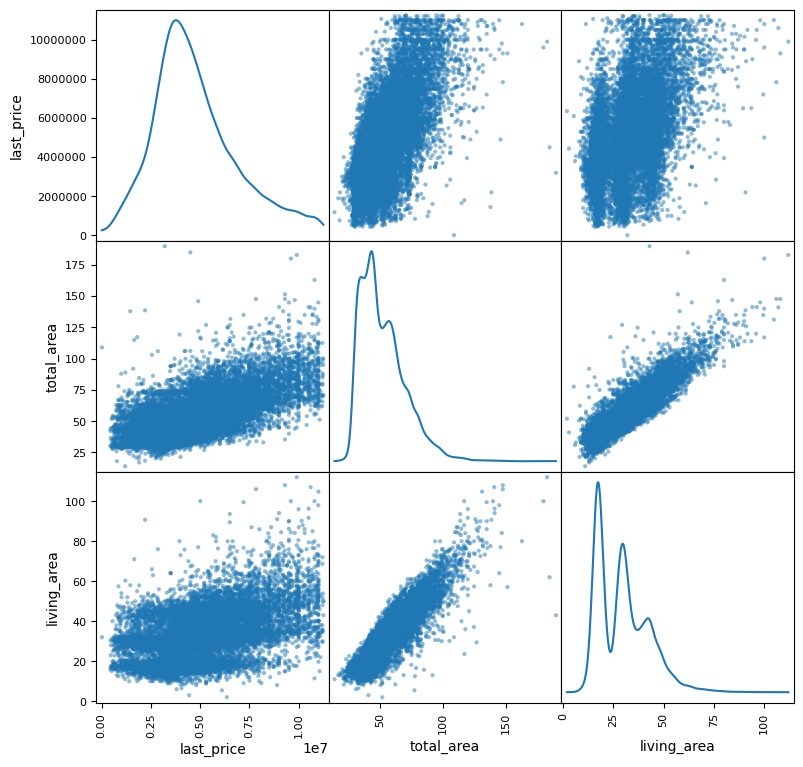

In [72]:
#матрица диаграмм рассеяния для выявления факторов влияющие на общую стоимость объекта
data_matrix =  ['last_price', 'total_area','living_area']
pd.plotting.scatter_matrix(data[data_matrix], diagonal = 'kde', figsize=(9, 9));

In [73]:
# а для более точной интерпретации была использована тепловые функции
data_matrix_two =  ['last_price', 'total_area','living_area']
corrMatrix = data[data_matrix_two].corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area
last_price,1.000000,0.671339,0.540597
total_area,0.671339,1.000000,0.909279
living_area,0.540597,0.909279,1.000000


**Выводы:** Для построения матрицы диаграмма рассеяния были отобраны параметры, которые имели больше всего корреляции с ценой -  параметры общей и жилой площади.  

Зависимость цены от этажа, на котором расположена квартира: 0.18237924476732476


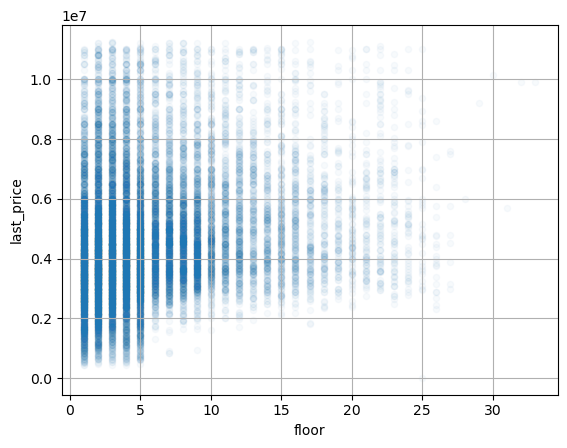

In [74]:
#проверка зависимости цены от этажа
price_vs_floor = data.plot(x='floor', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от этажа, на котором расположена квартира:', data['floor'].corr(data['last_price']))

In [75]:
#проверка зависимости цены от этажа через тепловые функции
data_matrix_three =  ['last_price', 'floor']
corrMatrix = data[data_matrix_three].corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,last_price,floor
last_price,1.000000,0.182379
floor,0.182379,1.000000


Зависимость цены от типа этажа, на котором расположена квартира: 0.18237924476732476


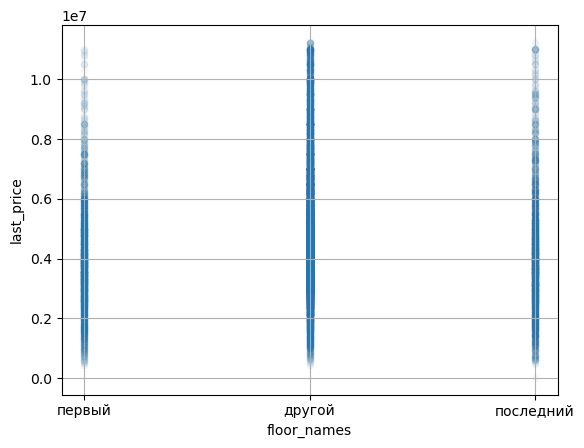

In [76]:
#проверка зависимости цены от типа этажа
price_vs_floor = data.plot(x='floor_names', y='last_price', kind='scatter',alpha =0.03, grid=True)
print ('Зависимость цены от типа этажа, на котором расположена квартира:', data['floor'].corr(data['last_price']))

In [77]:
#проверка зависимости цены от типа этажа через тепловые функции
data_matrix_five=  ['last_price', 'floor_names']
corrMatrix = data[data_matrix_five].corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,last_price
last_price,1.000000


#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра


In [78]:
# подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
top_location = data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10).reset_index()
top_location.columns = ['location', 'number of ads', 'last price']
print(top_location)

            location  number of ads  last price
0    Санкт-Петербург          11422   5000000.0
1     поселок Мурино            425   3500000.0
2     поселок Шушары            391   3950000.0
3         Всеволожск            347   3450000.0
4            Колпино            309   3600000.0
5             Пушкин            293   4900000.0
6  поселок Парголово            287   4130000.0
7            Гатчина            280   3000030.0
8    деревня Кудрово            223   3800000.0
9           Петергоф            179   3700000.0


In [79]:
#Населённый пункт с самой высокой стоимостью
top_location.head(1)

,location,number of ads,last price
0,Санкт-Петербург,11422,5000000.0


In [80]:
#Населённый пункт с самой низкой стоимостью
top_location.tail(1)

,location,number of ads,last price
9,Петергоф,179,3700000.0


*Выводы:* дороже всего жить в Санкт-Петербурге со средней ценой одного квадратного метра - 5000000. А дешевле всего в Петергофе, где стоимость - 3000030.

#### Зависимость стоимости объектов от расстояния до центра города.

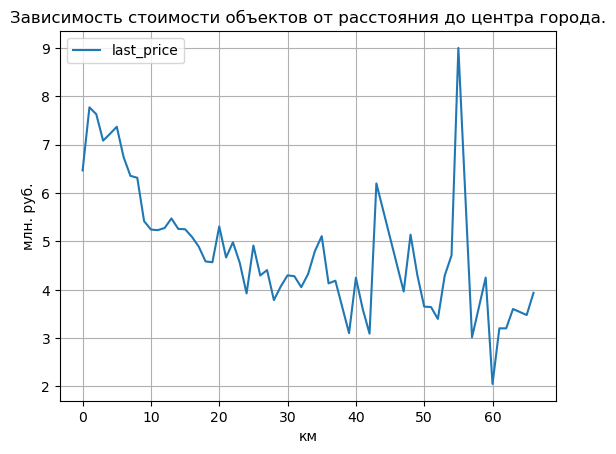

In [81]:
#подсчет зависимости стоимости от расстояния
spb = data[data['locality_name'] == 'Санкт-Петербург']
spb=data.dropna(subset=['last_price']).reset_index(drop=True)
spb=spb.dropna(subset=['city_centers_km']).reset_index(drop=True)
spb['last_price'] = spb['last_price']*0.000001
spb=spb.pivot_table(index='city_centers_km', values= 'last_price', aggfunc=np.mean)
spb.plot(grid = True, title = 'Зависимость стоимости объектов от расстояния до центра города.')
plt.xlabel("км")
plt.ylabel("млн. руб.")
plt.show()

*Выводы:* График показывате, что стоимость объектов меньше, если они расположены дальше центра города. Однако, есть несколько объектов расположенных на 55 км от центр со стоимость как в центральных квартирах.

### Общий вывод

Рынок недвижимости в Санкт-Петербурге и соседних населённых пунктах показал, следующие особенности и зависимости:
- Большим спросом пользуются 2х-3х комнатные квартиры с общей площадью в срезе от 40 до 100 кв.м., где жилая площадь составляла от 14 до 30-40 кв.м. 
- Стоимость квартир чаще выше 6-ти млн.рублей, а основным фактором формирования стоимости квартир является их общая площадь, в особенности его жилищная площадь. 
- Дома в основном не высокие до 7 этаже, причем клиенты предпочитают квартиры в любых этажах кроме первых и последних. Местоположение популярных квартир находятся не далеко от центра города (от 9000 до 12000 метров) и рядом с парком (до 2400 метров). 
- Таким образом, стоимость объектов меньше, если они расположены дальше от центра города. Однако, есть несколько объектов расположенных на 55 км от центр со стоимость как в центральных квартирах.   
- Тем самым, дороже всего жить в Санкт-Петербурге и дешевле всего в Петергофе. 
- Объявление квартир чаще всего публиковались в первых неделях начала и конца года (январь и декабрь)и в среднем могла стоят 156 дней или самое быстрое - в течение 30-40 дней.